# Import Data

In [1]:
from custom_utils import load_and_concatenate_parquet_files

df = load_and_concatenate_parquet_files('./data/preprocessed_df')
display(df)

,id,raw_text,preprocessed_text,label,label_names
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforcement high alert follow threat cop w...,1,real
1,1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,unbelievable obamas attorney general say charl...,1,real
2,2,"Bobby Jindal, raised Hindu, uses story of Chri...",bobby jindal raise hindu use story christian c...,0,fake
3,3,SATAN 2: Russia unvelis an image of its terrif...,satan russia unveli image terrifying new super...,1,real
4,4,About Time! Christian Group Sues Amazon and SP...,time christian group sue amazon splc designati...,1,real
...,...,...,...,...,...
63072,63072,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,wikileak email show clinton foundation fund la...,1,real
63073,63073,Russians steal research on Trump in hack of U....,russians steal research trump hack s democrati...,0,fake
63074,63074,WATCH: Giuliani Demands That Democrats Apolog...,watch giuliani demand democrats apologize trum...,1,real
63075,63075,Migrants Refuse To Leave Train At Refugee Camp...,migrant refuse leave train refugee camp hungar...,0,fake


# Data Analysis

## Display Label Distribution

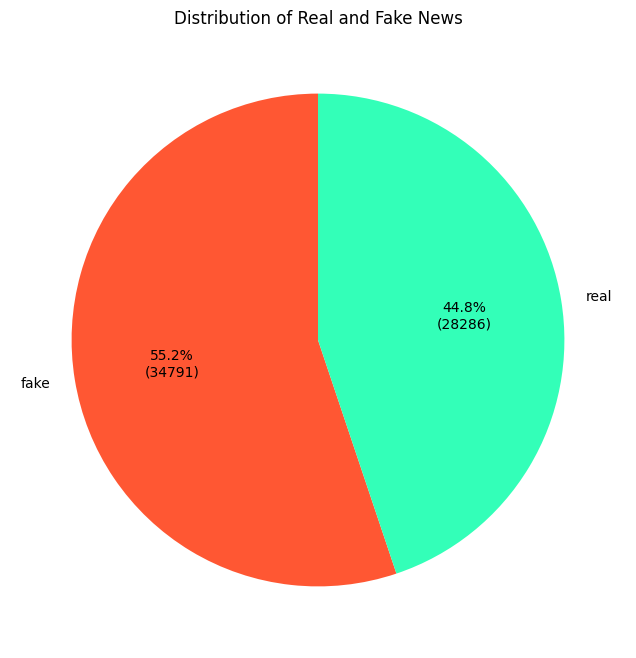

In [2]:
import matplotlib.pyplot as plt
label_counts = df['label_names'].value_counts()
plt.figure(figsize=(8, 8))
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

plt.pie(label_counts, labels=label_counts.index, autopct=autopct_format(label_counts), startangle=90, colors=['#FF5733', '#33FFB8'])
plt.title('Distribution of Real and Fake News')
plt.show()

## Display Text Length Distribution

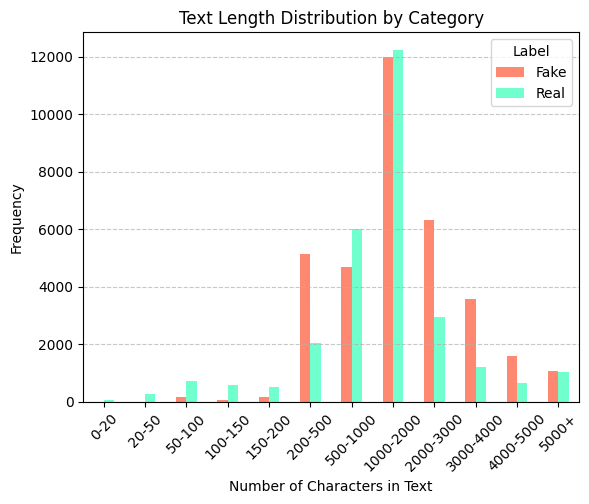

In [3]:
import matplotlib.pyplot as plt

df["body_len"] = df["preprocessed_text"].apply(lambda x: len(x) - x.count(" "))

bins = [0, 20, 50, 100, 150, 200, 500, 1000, 2000, 3000, 4000, 5000]  

def classify_length(length):
    for i in range(len(bins) - 1):
        if bins[i] <= length < bins[i + 1]:
            return f"{bins[i]}-{bins[i + 1]}"
    if length >= bins[-1]:
        return f"{bins[-1]}+"
    return None

df["length_bin"] = df["body_len"].apply(classify_length)

bin_counts = df.groupby(['length_bin', 'label']).size().unstack(fill_value=0)

bin_order = ["0-20", "20-50", "50-100", "100-150", "150-200", "200-500", "500-1000", "1000-2000", "2000-3000", "3000-4000", "4000-5000", "5000+"]
bin_counts = bin_counts.reindex(bin_order)

bin_counts.plot(kind='bar', alpha=0.7, color=["#FF5733", "#33FFB8"])
plt.title('Text Length Distribution by Category')
plt.xlabel('Number of Characters in Text')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(["Fake", "Real"], title="Label")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Display Word Count Distribution

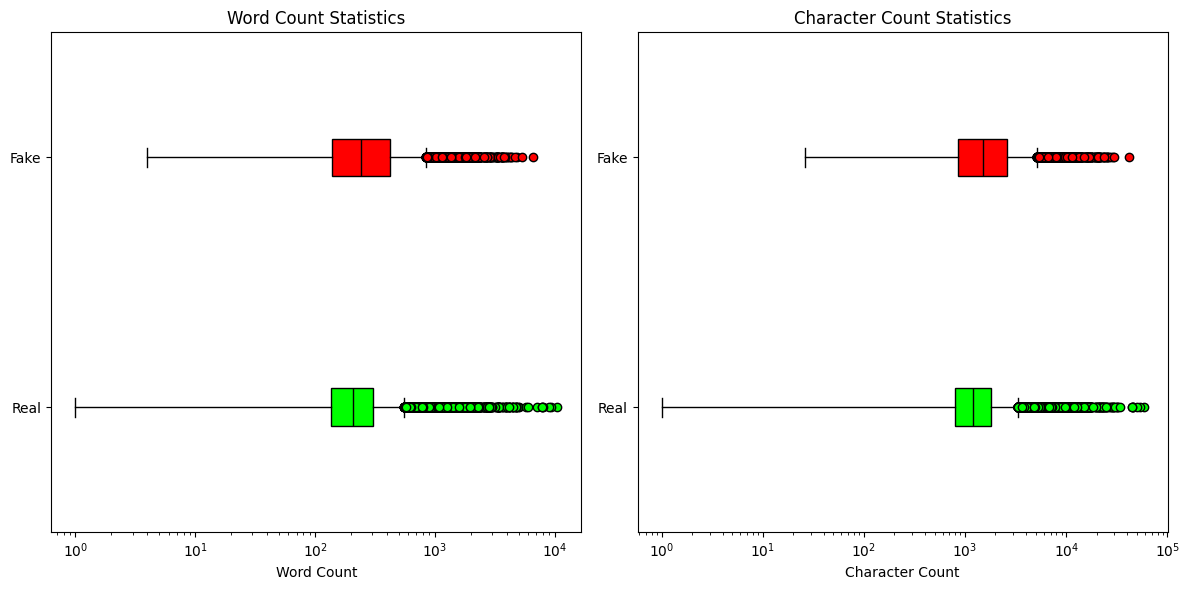

,Real News Word Count,Fake News Word Count,Real News Char Count,Fake News Char Count
Count,28286.00,34791.00,28286.00,34791.00
Mean,272.03,310.68,1623.11,1900.46
25%,325.36,276.47,1976.47,1670.04
50%,1.00,4.00,1.00,26.00
75%,135.00,139.00,788.00,853.00
Max,207.00,243.00,1207.00,1510.00
Min,303.00,421.00,1797.00,2571.50
Std,10466.00,6610.00,58258.00,41448.00


In [4]:
import pandas as pd
# Calculate word counts
df["word_count"] = df["preprocessed_text"].apply(lambda x: len(x.split()))

# Create figure
plt.figure(figsize=(12, 6))

# Word Count Statistics (left subplot)
plt.subplot(1, 2, 1)

# Real news boxplot
plt.boxplot(df[df["label_names"] == "real"]["word_count"],
            vert=False, 
            patch_artist=True, 
            positions=[1],
            tick_labels=["Real"],
            boxprops=dict(facecolor='lime', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='lime', markeredgecolor='black'))

# Fake news boxplot
plt.boxplot(df[df["label_names"] == "fake"]["word_count"],
            vert=False, 
            patch_artist=True, 
            positions=[2],
            tick_labels=["Fake"],
            boxprops=dict(facecolor='red', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', markeredgecolor='black'))

plt.xscale('log')
plt.title('Word Count Statistics')
plt.xlabel('Word Count')

# Character Count Statistics (right subplot)
plt.subplot(1, 2, 2)

# Real news boxplot
plt.boxplot(df[df["label_names"] == "real"]["body_len"],
            vert=False, 
            patch_artist=True, 
            positions=[1],
            tick_labels=["Real"],
            boxprops=dict(facecolor='lime', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='lime', markeredgecolor='black'))

# Fake news boxplot
plt.boxplot(df[df["label_names"] == "fake"]["body_len"],
            vert=False, 
            patch_artist=True, 
            positions=[2],
            tick_labels=["Fake"],
            boxprops=dict(facecolor='red', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', markeredgecolor='black'))

plt.xscale('log')
plt.title('Character Count Statistics')
plt.xlabel('Character Count')

plt.tight_layout()
plt.show()

# Calculate statistics for word counts by label
word_count_stats_real = df[df["label_names"] == "real"]["word_count"].describe()
word_count_stats_fake = df[df["label_names"] == "fake"]["word_count"].describe()

# Calculate statistics for character counts by label
char_count_stats_real = df[df["label_names"] == "real"]["body_len"].describe()
char_count_stats_fake = df[df["label_names"] == "fake"]["body_len"].describe()

word_count_df = pd.DataFrame({
    'Real News Word Count': word_count_stats_real,
    'Fake News Word Count': word_count_stats_fake
})

char_count_df = pd.DataFrame({
    'Real News Char Count': char_count_stats_real,
    'Fake News Char Count': char_count_stats_fake
})

# Combine the DataFrames side by side
combined_stats = pd.concat([word_count_df, char_count_df], axis=1)

# Round the numbers to 2 decimal places
combined_stats = combined_stats.round(2)

# Optionally, you can rename the index for better readability
combined_stats.index = ['Count', 'Mean', '25%', '50%', '75%', 'Max', 'Min', 'Std']

display(combined_stats)



## Distribution of Lexical Features

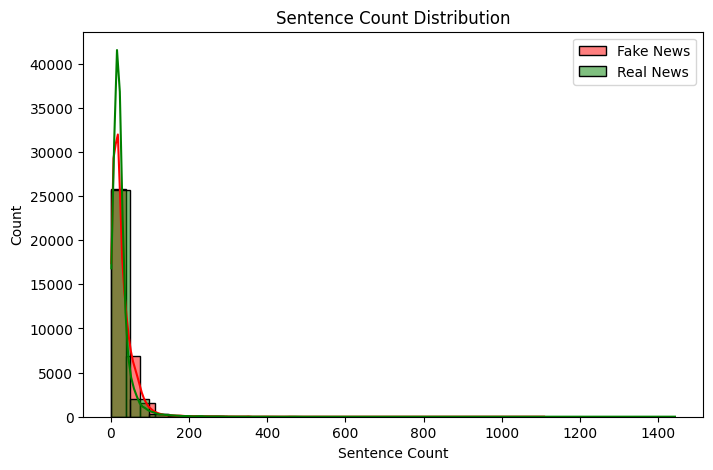

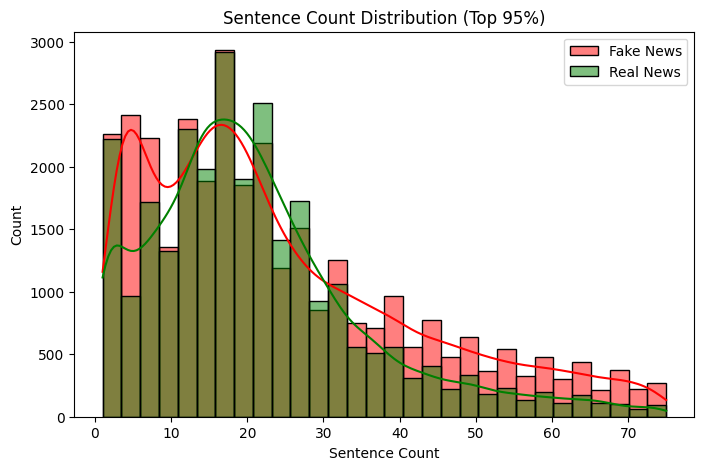

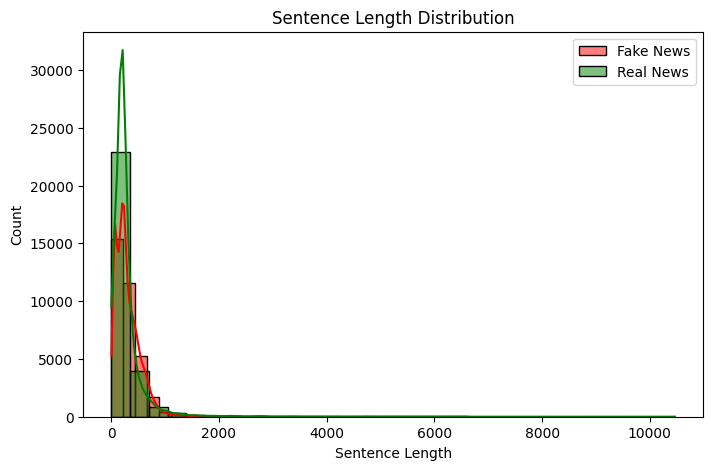

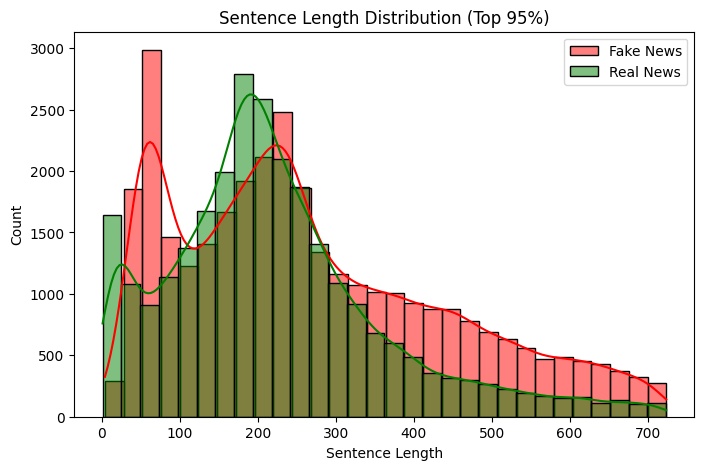

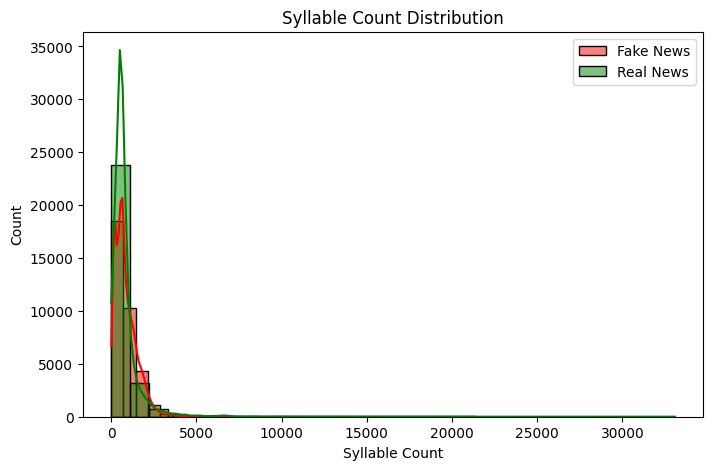

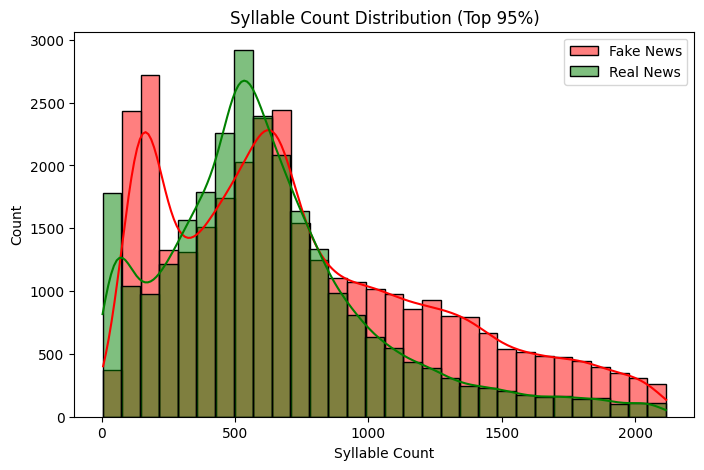

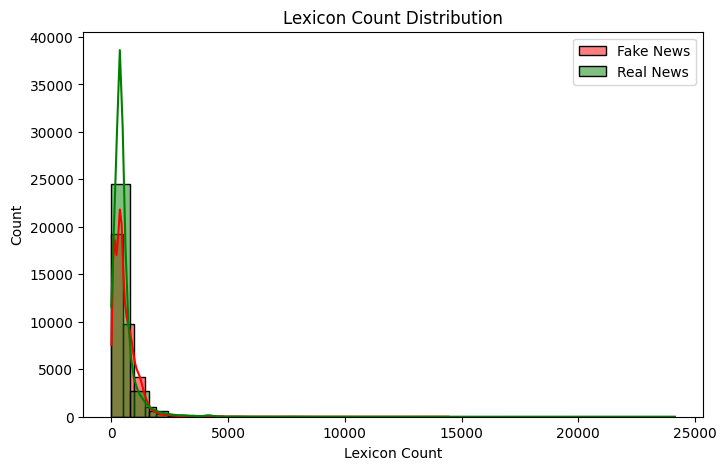

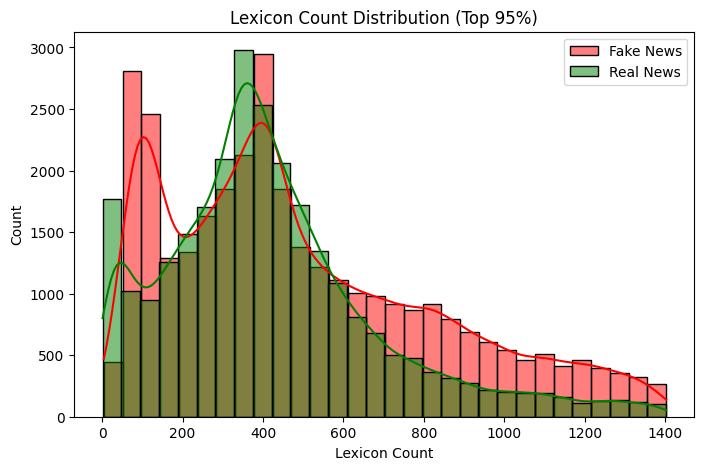

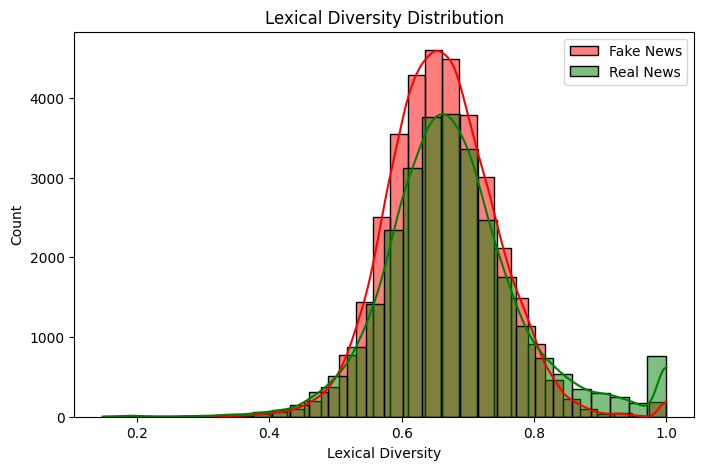

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(data, feature, title, xlabel, bins=30):
    fake_news = data[data["label"] == 0]
    real_news = data[data["label"] == 1]
    plt.figure(figsize=(8, 5))
    sns.histplot(fake_news[feature], bins=bins, color="red", label="Fake News", kde=True, alpha=0.5)
    sns.histplot(real_news[feature], bins=bins, color="green", label="Real News", kde=True, alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    
df = pd.read_parquet('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/analysis_dataframes/readability_metrics.parquet')

plot_histogram(df, "sentence_count", "Sentence Count Distribution", "Sentence Count")
top_95_df = df[df["sentence_count"] <= df["sentence_count"].quantile(0.95)]
plot_histogram(top_95_df, "sentence_count", "Sentence Count Distribution (Top 95%)", "Sentence Count")

plot_histogram(df, "sentence_lengths", "Sentence Length Distribution", "Sentence Length")
top_95_df = df[df["sentence_lengths"] <= df["sentence_lengths"].quantile(0.95)]
plot_histogram(top_95_df, "sentence_lengths", "Sentence Length Distribution (Top 95%)", "Sentence Length")

plot_histogram(df, "syllable_count", "Syllable Count Distribution", "Syllable Count")
top_95_df = df[df["syllable_count"] <= df["syllable_count"].quantile(0.95)]
plot_histogram(top_95_df, "syllable_count", "Syllable Count Distribution (Top 95%)", "Syllable Count")

plot_histogram(df, "lexicon_count", "Lexicon Count Distribution", "Lexicon Count")
top_95_df = df[df["lexicon_count"] <= df["lexicon_count"].quantile(0.95)]
plot_histogram(top_95_df, "lexicon_count", "Lexicon Count Distribution (Top 95%)", "Lexicon Count")

plot_histogram(df, "lexical_diversity", "Lexical Diversity Distribution", "Lexical Diversity")





## Readability Score Comparison

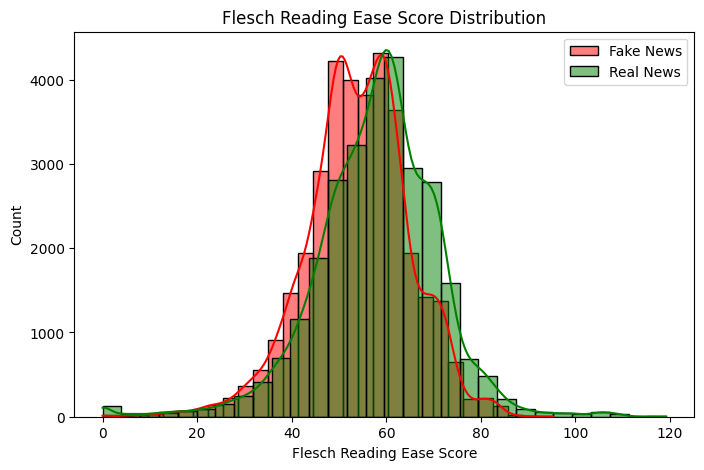

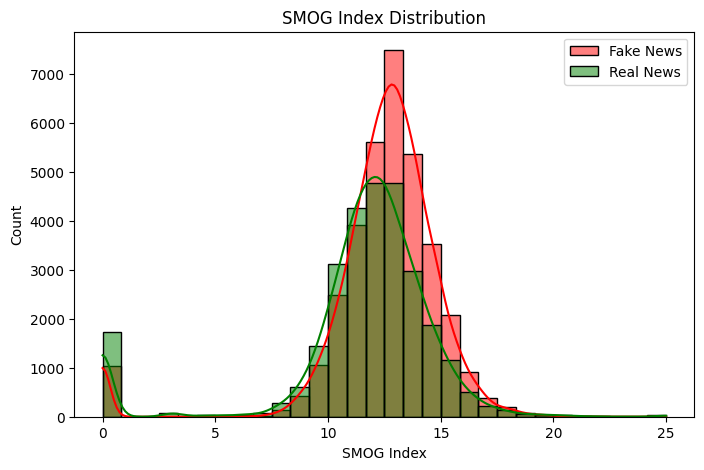

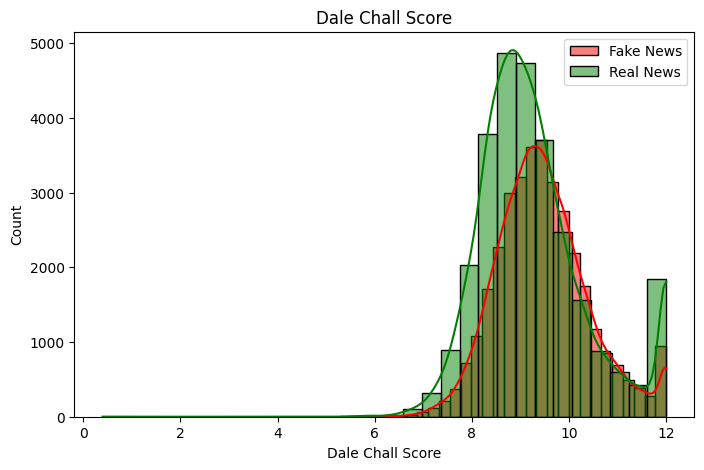

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histogram(data, feature, title, xlabel, bins=30):
    fake_news = data[data["label"] == 0]
    real_news = data[data["label"] == 1]
    plt.figure(figsize=(8, 5))
    sns.histplot(fake_news[feature], bins=bins, color="red", label="Fake News", kde=True, alpha=0.5)
    sns.histplot(real_news[feature], bins=bins, color="green", label="Real News", kde=True, alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    
df = pd.read_parquet('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/analysis_dataframes/readability_metrics.parquet')

plot_histogram(df, "flesch_reading_ease", "Flesch Reading Ease Score Distribution", "Flesch Reading Ease Score")
plot_histogram(df, "smog_index", "SMOG Index Distribution", "SMOG Index")
plot_histogram(df, "dale_chall_score", "Dale Chall Score", "Dale Chall Score")

## Sentiment Analysis
### Sentiment Subjectivity
- 0: The text is entirely objective (factual, non-opinionated).
- 1: The text is entirely subjective (opinion-based, emotional).

### Sentiment Polarity
- -1: Strongly negative sentiment.
-  0: Neutral sentiment (no strong positive or negative sentiment).
- +1: Strongly positive sentiment.


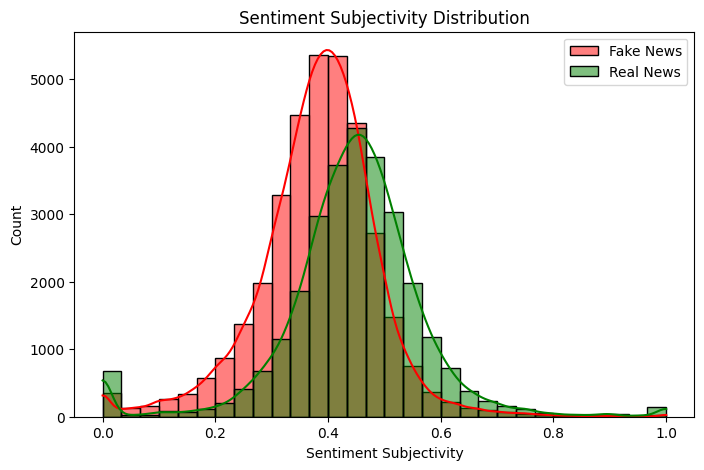

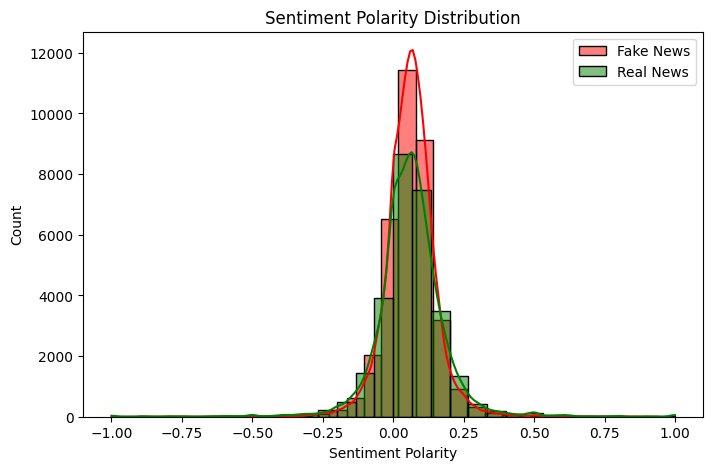

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histogram(data, feature, title, xlabel, bins=30):
    fake_news = data[data["label"] == 0]
    real_news = data[data["label"] == 1]
    plt.figure(figsize=(8, 5))
    sns.histplot(fake_news[feature], bins=bins, color="red", label="Fake News", kde=True, alpha=0.5)
    sns.histplot(real_news[feature], bins=bins, color="green", label="Real News", kde=True, alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    
df = pd.read_parquet('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/analysis_dataframes/readability_metrics.parquet')
plot_histogram(df, "sentiment_subjectivity", "Sentiment Subjectivity Distribution", "Sentiment Subjectivity")
plot_histogram(df, "sentiment_polarity", "Sentiment Polarity Distribution", "Sentiment Polarity")


## Entity Counts

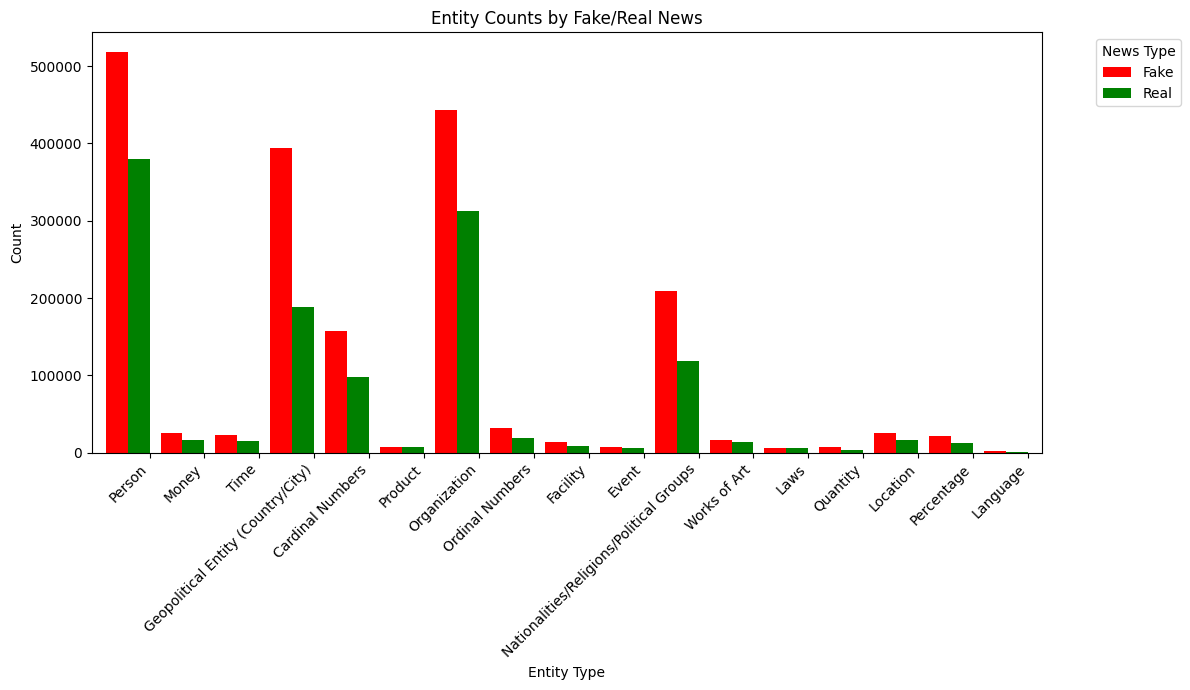

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/analysis_dataframes/entity_counts.parquet')

entity_dict = {
    'PERSON': 'Person', 
    'MONEY': 'Money', 
    'TIME': 'Time', 
    'GPE': 'Geopolitical Entity (Country/City)', 
    'CARDINAL': 'Cardinal Numbers', 
    'PRODUCT': 'Product', 
    'ORG': 'Organization', 
    'ORDINAL': 'Ordinal Numbers', 
    'FAC': 'Facility', 
    'EVENT': 'Event', 
    'NORP': 'Nationalities/Religions/Political Groups', 
    'WORK_OF_ART': 'Works of Art', 
    'LAW': 'Laws', 
    'QUANTITY': 'Quantity', 
    'LOC': 'Location', 
    'PERCENT': 'Percentage', 
    'LANGUAGE': 'Language'
}

entity_columns = list(entity_dict.keys()) 

df_entity_by_label = df.groupby('label')[entity_columns].sum()

colors = ['red', 'green']

ax = df_entity_by_label.T.plot(kind='bar', figsize=(12, 7), width=0.8, position=1, color=colors)
plt.title("Entity Counts by Fake/Real News")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.xticks(ticks=range(len(entity_dict)), labels=[entity_dict[col] for col in entity_columns], rotation=45)
plt.legend(title="News Type", labels=["Fake", "Real"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Dependency Frequency Comparison

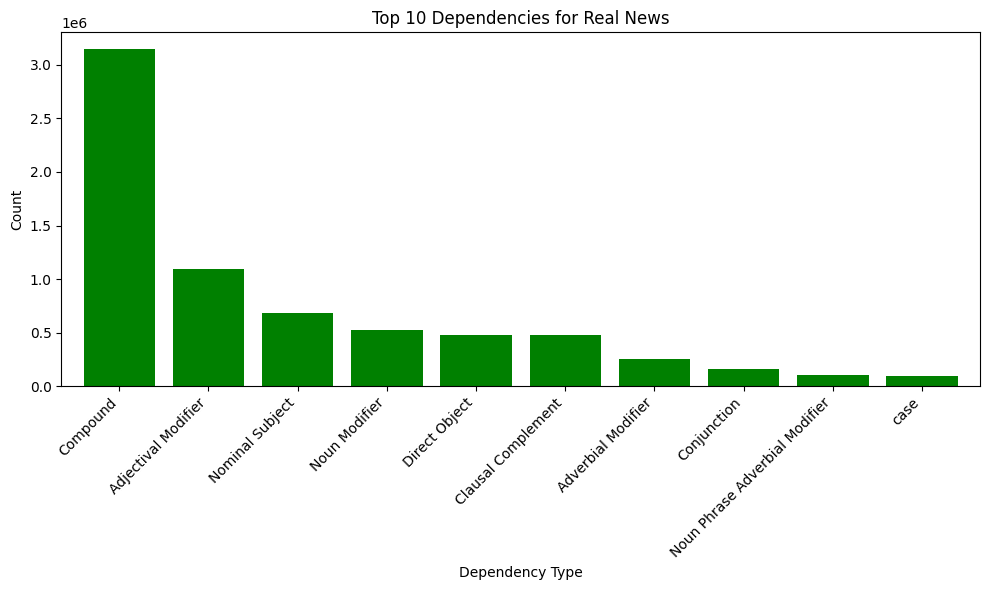

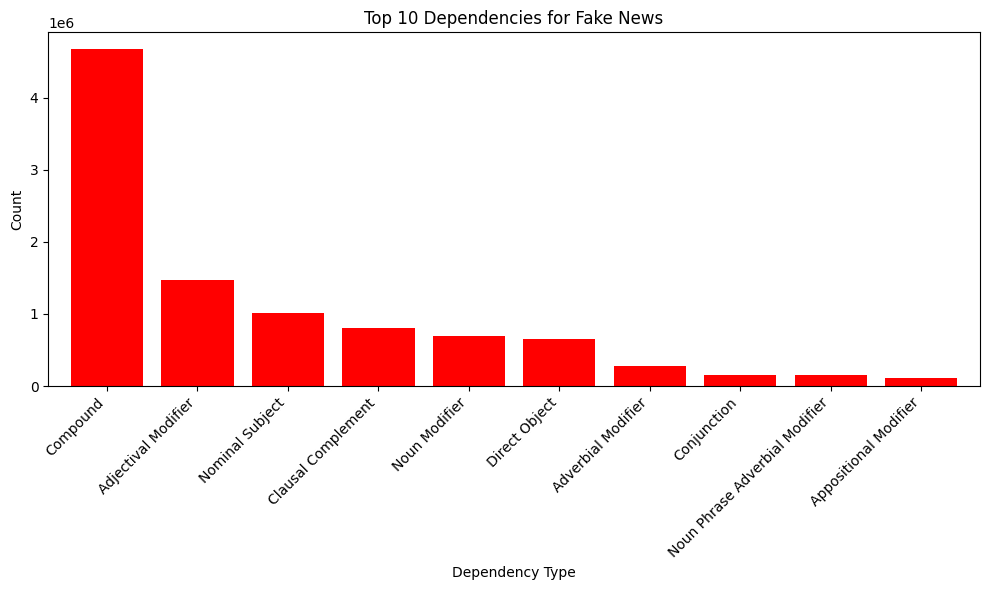

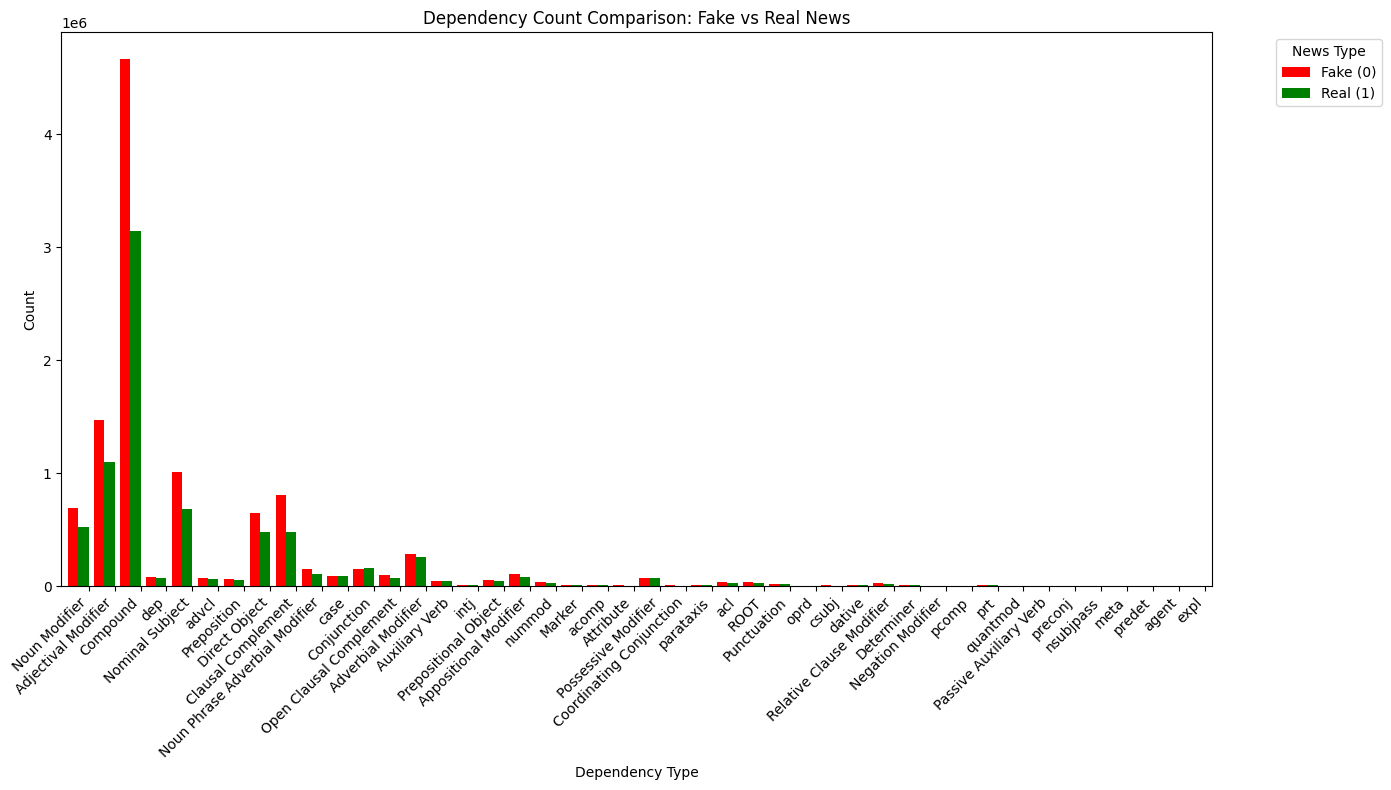

In [37]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_parquet('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/analysis_dataframes/dependency_counts.parquet')

readable_labels = {
    'nsubj': 'Nominal Subject',
    'dobj': 'Direct Object',
    'pobj': 'Prepositional Object',
    'iobj': 'Indirect Object',
    'advmod': 'Adverbial Modifier',
    'amod': 'Adjectival Modifier',
    'cc': 'Coordinating Conjunction',
    'conj': 'Conjunction',
    'prep': 'Preposition',
    'poss': 'Possessive Modifier',
    'compound': 'Compound',
    'ccomp': 'Clausal Complement',
    'nmod': 'Noun Modifier',
    'npadvmod': 'Noun Phrase Adverbial Modifier',
    'appos': 'Appositional Modifier',
    'det': 'Determiner',
    'punct': 'Punctuation',
    'xcomp': 'Open Clausal Complement',
    'relcl': 'Relative Clause Modifier',
    'mark': 'Marker',
    'attr': 'Attribute',
    'vocative': 'Vocative',
    'prep': 'Preposition',
    'aux': 'Auxiliary Verb',
    'auxpass': 'Passive Auxiliary Verb',
    'neg': 'Negation Modifier'
}

colors = ['red', 'green']

dependency_columns = [col for col in df.columns if col not in ['id', 'label']]

def plot_top_10_dependencies(df, label):
    df_label = df[df['label'] == label]
    
    dependency_counts = df_label[dependency_columns].sum().sort_values(ascending=False)
    top_10_dependencies = dependency_counts.head(10)
    
    plt.figure(figsize=(10, 6))
    top_10_dependencies.plot(kind='bar', color=colors[label], width=0.8)
    plt.title(f"Top 10 Dependencies for {'Real' if label == 1 else 'Fake'} News")
    plt.xlabel("Dependency Type")
    plt.ylabel("Count")
    
    plt.xticks(ticks=range(len(top_10_dependencies)), labels=[readable_labels.get(dep, dep) for dep in top_10_dependencies.index], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_all_dependencies(df):

    df_fake = df[df['label'] == 0][dependency_columns].sum()
    df_real = df[df['label'] == 1][dependency_columns].sum()
    
    df_combined = pd.DataFrame({
        'Fake News': df_fake,
        'Real News': df_real
    })
    
    ax = df_combined.plot(kind='bar', width=0.8, figsize=(14, 8), position=1, color=['red', 'green'])
    
    plt.title("Dependency Count Comparison: Fake vs Real News")
    plt.xlabel("Dependency Type")
    plt.ylabel("Count")
    plt.xticks(ticks=range(len(df_combined)), labels=[readable_labels.get(dep, dep) for dep in df_combined.index], rotation=45, ha='right')
    plt.legend(title="News Type", labels=["Fake", "Real"], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
plot_top_10_dependencies(df, 1)

plot_top_10_dependencies(df, 0)

plot_all_dependencies(df)

# Creation of analytical DataFrames

## Code to create big analysis DataFrame
This code takes very long and produces a very inefficient .parquet file.\
Execute with caution!

In [ ]:
import spacy
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import gc
from pathlib import Path
from tqdm import tqdm
from collections import Counter
from itertools import combinations
from textblob import TextBlob
import textstat

class TextProcessor:
    def __init__(self, model_name="en_core_web_sm", n_jobs=4, chunk_size=100):
        self.model_name = model_name
        self.n_jobs = n_jobs
        self.chunk_size = chunk_size
        self.nlp = self._load_spacy()
        self.nlp.add_pipe('sentencizer', before='parser')
        
    def _load_spacy(self):
        try:
            return spacy.load(self.model_name)
        except OSError:
            spacy.cli.download(self.model_name)
            return spacy.load(self.model_name)

    def _process_raw_texts(self, texts, labels):
        """Process raw texts for features that require uncleaned input"""
        docs = list(self.nlp.pipe(texts, batch_size=10, n_process=self.n_jobs))
        
        raw_data = []
        for i, doc in enumerate(docs):
            text = doc.text
            blob = TextBlob(text)

            raw_data.append({
                'entities': [{'text': ent.text, 'label': ent.label_} for ent in doc.ents],  # Named Entities
                'readability_score': textstat.flesch_kincaid_grade(text),  # Readability
                'sentiment_polarity': blob.sentiment.polarity,  # Sentiment (-1 to 1)
                'sentiment_subjectivity': blob.sentiment.subjectivity,  # Subjectivity (0 to 1)
                'label': labels[i]
            })
        
        del docs
        gc.collect()
        return raw_data

    def _process_cleaned_texts(self, texts, labels):
        """Process cleaned texts for structured linguistic analysis"""
        docs = list(self.nlp.pipe(texts, batch_size=20))
        
        cleaned_data = []
        for i, doc in enumerate(docs):
            words = [token.text for token in doc if token.is_alpha]
            dependencies = [token.dep_ for token in doc if token.is_alpha]
            sentence_lengths = [len(sent) for sent in doc.sents][0]
            cooccurrences = {str(k): v for k, v in Counter(combinations(dependencies, 2)).items()}
            passive_sentences = sum(1 for sent in doc.sents if any(token.dep_ == "auxpass" for token in sent))
            lexical_diversity = len(set(words)) / len(words) if words else 0

            cleaned_data.append({
                'dependencies': dependencies,
                'sentence_lengths': sentence_lengths,
                'cooccurrences': dict(cooccurrences),
                'lexical_diversity': lexical_diversity,
                'passive_sentence_count': passive_sentences,
                'label': labels[i]
            })
        
        del docs
        gc.collect()
        return cleaned_data

    def process_texts(self, raw_texts, cleaned_texts, labels, output_file='processed_data.parquet'):
        """Run both raw and cleaned text processing and save results"""
        all_raw_data = []
        all_cleaned_data = []

        for i in tqdm(range(0, len(raw_texts), self.chunk_size), desc="Processing texts"):
            raw_chunk = raw_texts[i:i + self.chunk_size]
            cleaned_chunk = cleaned_texts[i:i + self.chunk_size]
            label_chunk = labels[i:i + self.chunk_size]

            all_raw_data.extend(self._process_raw_texts(raw_chunk, label_chunk))
            all_cleaned_data.extend(self._process_cleaned_texts(cleaned_chunk, label_chunk))


        df_raw = pd.DataFrame(all_raw_data)
        df_cleaned = pd.DataFrame(all_cleaned_data)
        df_raw['id'] = range(len(df_raw))
        df_cleaned['id'] = range(len(df_cleaned))
        df = df_raw.merge(df_cleaned, on='id', suffixes=('_raw', '_cleaned'))
        print(df.shape)

        table = pa.Table.from_pandas(df)
        pq.write_table(table, output_file)

    @staticmethod
    def load_processed_data(output_file='processed_data.parquet'):
        """Load processed data from Parquet file"""
        return pd.read_parquet(output_file)

# from custom_utils import load_and_concatenate_parquet_files

# df = load_and_concatenate_parquet_files('./data/preprocessed_df')

# raw_texts = df['raw_text'].tolist()  # Raw input
# cleaned_texts = df['preprocessed_text'].tolist()  # Preprocessed text (lemmatized, cleaned)
# labels = df['label'].tolist()  # Real/Fake labels

# if not Path('processed_data.parquet').exists():
#     processor = TextProcessor(n_jobs=4, chunk_size=100) 
#     processor.process_texts(raw_texts, cleaned_texts, labels)


Processing texts: 100%|██████████| 631/631 [1:14:08<00:00,  7.05s/it]


(63077, 12)


## Calculate readability metrics

In [6]:
import pandas as pd
import textstat
import swifter
from custom_utils import load_and_concatenate_parquet_files

df = load_and_concatenate_parquet_files('./data/preprocessed_df') 

def compute_readability_metrics(text):
    """Computes readability scores for a given text."""
    return {
        "syllable_count": textstat.syllable_count(text),
        "lexicon_count": textstat.lexicon_count(text, removepunct=True),
        "sentence_count": textstat.sentence_count(text),
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "smog_index": textstat.smog_index(text),
        "dale_chall_score": textstat.dale_chall_readability_score(text)
    }

readability_df = df[["id", "label"]].copy()
metrics = df["raw_text"].swifter.apply(compute_readability_metrics).apply(pd.Series)
readability_df = pd.concat([readability_df, metrics], axis=1)

display(readability_df)


Pandas Apply:   0%|          | 0/63077 [00:00<?, ?it/s]

,id,label,syllable_count,lexicon_count,sentence_count,flesch_reading_ease,smog_index,dale_chall_score
0,0,1,1225.0,887.0,57.0,72.56,10.0,7.67
1,1,1,85.0,52.0,2.0,45.09,0.0,11.30
2,2,0,2040.0,1334.0,58.0,56.59,13.3,9.04
3,3,1,494.0,340.0,12.0,51.21,12.6,10.89
4,4,1,395.0,256.0,13.0,59.94,12.2,9.42
...,...,...,...,...,...,...,...,...
63072,63072,1,315.0,219.0,7.0,56.63,12.0,9.01
63073,63073,0,1218.0,741.0,38.0,51.68,13.8,9.74
63074,63074,1,907.0,613.0,28.0,57.71,13.1,8.30
63075,63075,0,715.0,485.0,23.0,58.52,11.1,8.88


## Create more efficient Entity Count DataFrame

In [1]:
import pandas as pd
from collections import Counter
import swifter
df = pd.read_parquet("/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/analysis_dataframes/big_analysis_df.parquet")

def extract_entity_counts(row):
    entity_counts = Counter()
    for entity in row:
        if isinstance(entity, dict) and 'label' in entity:
            entity_counts[entity['label']] += 1
    return entity_counts

entity_counts = df['entities'].swifter.apply(extract_entity_counts)
entity_counts_df = pd.DataFrame(list(entity_counts))
entity_counts_df["id"] = range(len(entity_counts_df))
entity_counts_df = entity_counts_df.fillna(0).astype(int)
entity_counts_df = entity_counts_df.astype(int)
display(entity_counts_df)


Pandas Apply:   0%|          | 0/63077 [00:00<?, ?it/s]

,DATE,PERSON,MONEY,TIME,GPE,CARDINAL,PRODUCT,ORG,ORDINAL,FAC,EVENT,NORP,WORK_OF_ART,LAW,QUANTITY,LOC,PERCENT,LANGUAGE,id
0,3,12,4,5,6,13,2,7,1,1,1,4,0,0,0,0,0,0,0
1,0,3,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,17,36,0,3,26,4,0,20,0,0,1,16,7,2,0,0,0,0,2
3,5,1,0,0,16,5,2,10,1,0,0,4,0,0,8,2,0,0,3
4,3,3,0,0,1,0,1,17,0,0,0,3,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63072,2,16,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,63072
63073,18,20,0,1,18,4,1,31,2,1,0,17,0,0,0,0,0,0,63073
63074,10,40,0,0,3,1,0,11,3,0,0,10,0,0,0,2,0,0,63074
63075,7,4,0,0,17,5,0,11,0,1,0,13,0,0,0,7,1,1,63075


## Create more efficient Dependency Count DataFrame

In [20]:
import pandas as pd
from collections import Counter

df = pd.read_parquet("/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/analysis_dataframes/big_analysis_df.parquet")

def extract_dependency_counts(row):
    dependency_counts = Counter(row)
    return dependency_counts

dependency_counts = df['dependencies'].swifter.apply(extract_dependency_counts)
dependency_counts_df = pd.DataFrame(list(dependency_counts))
dependency_counts_df = dependency_counts_df.fillna(0)
dependency_counts_df = dependency_counts_df.astype('Int64')
final_df = pd.concat([df[['id']], dependency_counts_df], axis=1)
final_df = final_df.merge(df[['id', 'label_cleaned']], on='id').rename(columns={'label_cleaned': 'label'})

display(final_df)

Pandas Apply:   0%|          | 0/63077 [00:00<?, ?it/s]

,id,nmod,amod,compound,dep,nsubj,advcl,prep,dobj,ccomp,...,prt,quantmod,auxpass,preconj,nsubjpass,meta,predet,agent,expl,label
0,0,28,65,162,4,39,6,6,39,46,...,0,0,0,0,0,0,0,0,0,1
1,1,1,5,18,0,4,0,0,2,1,...,0,0,0,0,0,0,0,0,0,1
2,2,44,100,319,4,61,3,2,46,45,...,0,0,0,0,0,0,0,0,0,0
3,3,11,26,90,3,15,0,3,11,8,...,0,0,0,0,0,0,0,0,0,1
4,4,7,22,75,9,8,1,0,9,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63072,63072,1,6,68,1,12,1,0,4,11,...,1,0,0,0,0,0,0,0,0,1
63073,63073,29,62,164,4,50,1,2,16,44,...,1,0,0,0,0,0,0,0,0,0
63074,63074,12,32,113,2,35,6,2,27,32,...,1,0,0,0,0,0,0,0,0,1
63075,63075,21,38,107,4,19,2,2,14,14,...,0,0,0,0,0,0,0,0,0,0


## Create N-Gram DataFrame

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from custom_utils import load_and_concatenate_parquet_files
import pandas as pd


df = load_and_concatenate_parquet_files("/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/preprocessed_df") 

# Get top n-grams for real and fake news separately
real_texts = df[df['label'] == 0]['preprocessed_text']
fake_texts = df[df['label'] == 1]['preprocessed_text']

# Function to extract n-grams for different ranges
def get_all_ngrams(texts, n_range=(1, 4), top_n=20):
    all_ngrams = []
    print ("Extracting n-grams for range:", n_range)
    for n in range(n_range[0], n_range[1] + 1):
        print(f"Extracting {n}-grams...")
        vectorizer = CountVectorizer(ngram_range=(n, n))
        ngrams = vectorizer.fit_transform(texts)
        sum_ngrams = ngrams.sum(axis=0)
        freq = [(word, sum_ngrams[0, idx], n) for word, idx in vectorizer.vocabulary_.items()]
        all_ngrams.extend(sorted(freq, key=lambda x: x[1], reverse=True)[:top_n])
    return all_ngrams

# Compute n-grams for real and fake news separately
real_ngrams = get_all_ngrams(real_texts, n_range=(1, 4))
fake_ngrams = get_all_ngrams(fake_texts, n_range=(1, 4))

# Combine into a single DataFrame
ngrams_combined_df = pd.DataFrame({
    "category": ["real"] * len(real_ngrams) + ["fake"] * len(fake_ngrams),
    "ngram": [ngram for ngram, _, _ in real_ngrams + fake_ngrams],
    "count": [count for _, count, _ in real_ngrams + fake_ngrams],
    "ngram_size": [size for _, _, size in real_ngrams + fake_ngrams],
})

display(ngrams_combined_df)



Extracting n-grams for range: (1, 4)
Extracting 1-grams...


KeyboardInterrupt: 

## Create SVG WordClouds

In [ ]:
from wordcloud import WordCloud
import os
import matplotlib.pyplot as plt
from custom_utils import load_and_concatenate_parquet_files


def save_wordcloud_images_from_column(
    df, column, label_column=None, output_dir="wordclouds", topic_column=None
):
    """
    Generates and saves wordclouds based on the provided column in the dataset.
    
    Args:
        df (pd.DataFrame): Input dataset.
        column (str): The column containing the article text.
        label_column (str): Column indicating labels (e.g., fake/real news).
        output_dir (str): Directory to save the wordclouds.
        topic_column (str): Column indicating topics for optional topic-based filtering.
    """
    os.makedirs(output_dir, exist_ok=True)

    if label_column:
        for label in df[label_column].unique():
            label_text = ' '.join(df[df[label_column] == label][column])
            label_wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(label_text)
            label_name = "fake_news" if label == 0 else "real_news"
            plt.imshow(label_wordcloud, interpolation="bilinear")
            plt.axis("off")  # Turn off the axes
            plt.gca().patch.set_visible(False)  # Hide the patch
            plt.savefig(f'{output_dir}/{label_name}' + ".svg", dpi=700, format="svg", transparent=True, bbox_inches='tight', pad_inches=0)
            plt.close()

df = load_and_concatenate_parquet_files('./data/preprocessed_df')

save_wordcloud_images_from_column(df, column="preprocessed_text", label_column="label")


# Creating of Train, Valid & Test Split

Train size:  (44153, 3)


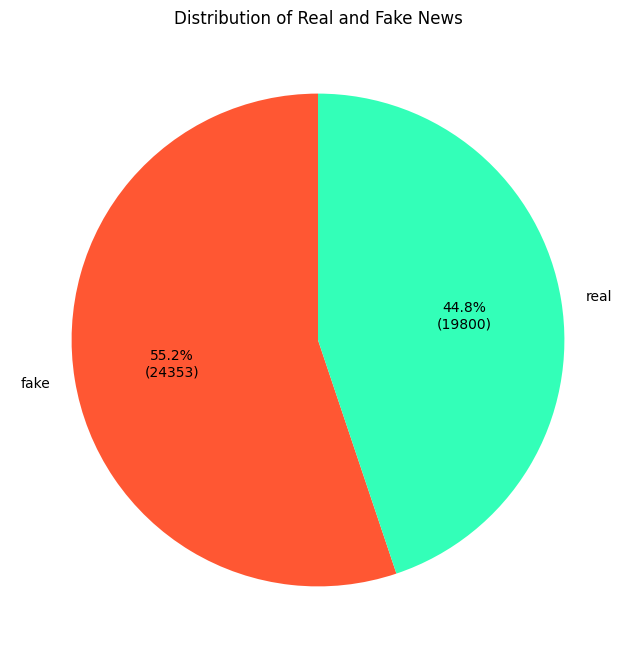

Validation size:  (12616, 3)


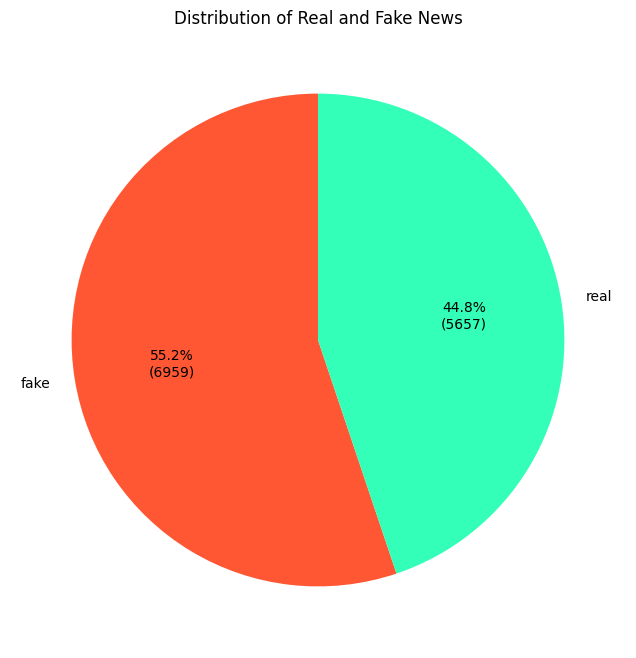

Test size:  (6308, 3)


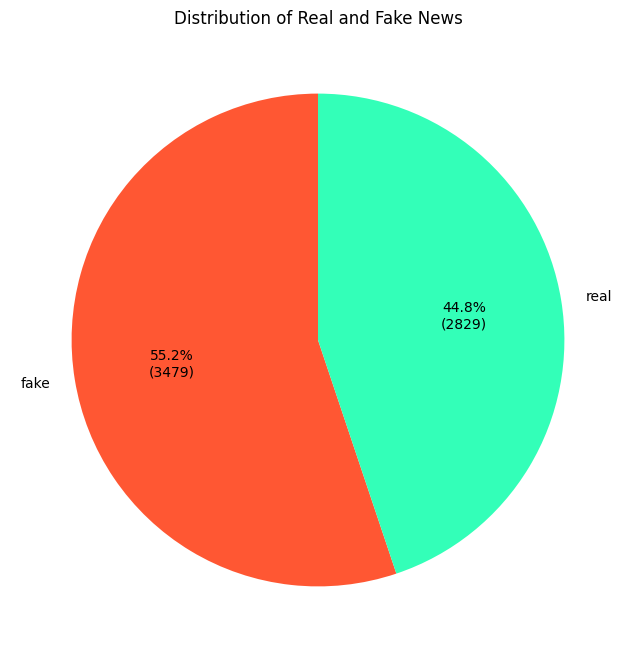

: 

In [39]:
from sklearn.model_selection import train_test_split
from custom_utils import load_and_concatenate_parquet_files
import matplotlib.pyplot as plt
import pandas as pd

df = load_and_concatenate_parquet_files("/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/preprocessed_df")
df = df[["preprocessed_text","label", "label_names"]]

def plot_distribution(df):
    label_counts = df['label_names'].value_counts()
    plt.figure(figsize=(8, 8))
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({val})'
        return my_format

    plt.pie(label_counts, labels=label_counts.index, autopct=autopct_format(label_counts), startangle=90, colors=['#FF5733', '#33FFB8'])
    plt.title('Distribution of Real and Fake News')
    plt.show()

train, valid      = train_test_split(df,test_size=0.3,stratify=df['label'], random_state=42)
valid , test = train_test_split(valid,test_size=1/3,stratify=valid['label'], random_state=42)
print("Train size: ", train.shape)
plot_distribution(train)
print("Validation size: ", valid.shape)
plot_distribution(valid)
print("Test size: ", test.shape)
plot_distribution(test)

# train.to_parquet("/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/model_training/train_df.parquet")
# valid.to_parquet("/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/model_training/valid_df.parquet")
# test.to_parquet("/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/data/model_training/test_df.parquet")
